1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy  import fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

%matplotlib inline

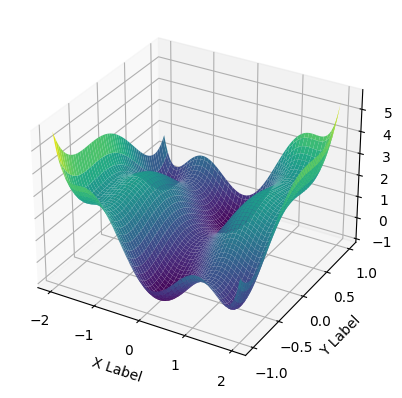

minima loacted at x = 0.08985156732299072  y = -0.7126432615451557  and the value of function at this point is =  -1.0316284515942242


In [10]:
def f(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4)/3)* x[0]**2 + x[0]*x[1] + (4*x[1]**2 -4)*x[1]**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

x_grid, y_grid = np.meshgrid(x, y)
xy_combinations = np.column_stack((x_grid.flatten(), y_grid.flatten()))


f_values = np.apply_along_axis(f, 1, xy_combinations)
f_values = f_values.reshape(x_grid.shape)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Scatter plot
ax.plot_surface(x_grid, y_grid, f_values, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('f Label')

# Show the plot
plt.show()

bnds = ((-2, 2), (-1, 1))
res = optimize.minimize(f, (2, 0), method='SLSQP', bounds=bnds)
print("minima loacted at x =", res.x[0], " y =",res.x[1], ' and the value of function at this point is = ',f(res.x))


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing.

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

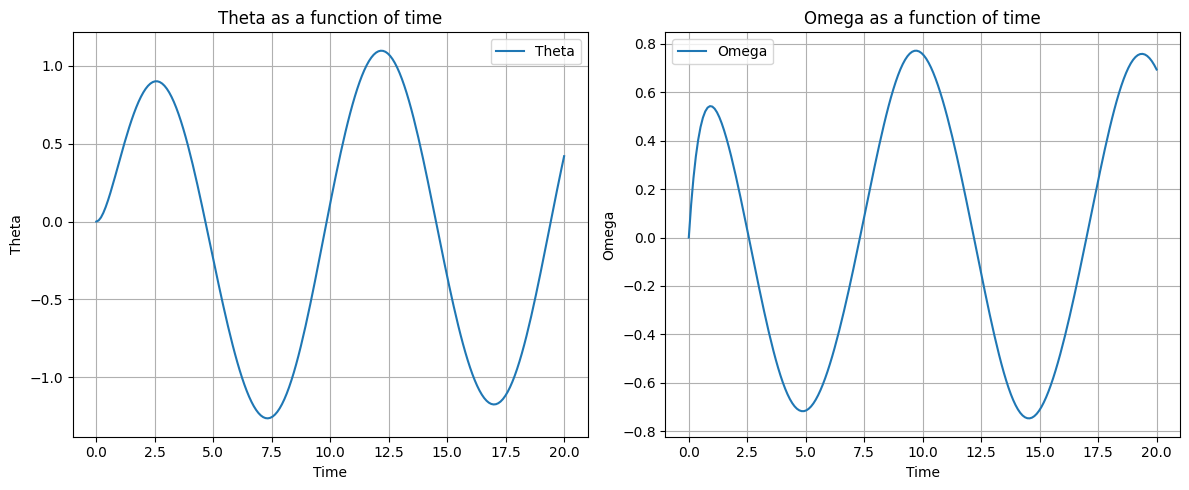

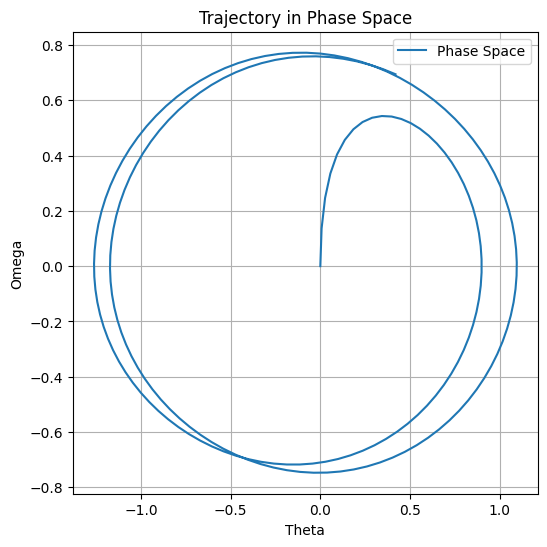

In [11]:
# Define the function representing the right-hand side of the system
def pendulum_system(y, t, Q, omega_0, d, Omega):
    theta, omega = y
    dydt = [omega, -Q * omega - omega_0**2 * np.sin(theta) + d * np.cos(Omega * t)]
    return dydt

# Set initial conditions and parameters
theta0 = 0.0
omega0 = 0.0
initial_conditions = [theta0, omega0]

Q = 2.0
omega_0 = 0.65
d = 1.5
Omega = 0.65  # Assuming the same value as omega_0 for illustration

# Set the time points for the solution
t = np.linspace(0, 20, 200)

# Solve the system of ODEs using odeint
solution = odeint(pendulum_system, initial_conditions, t, args=(Q, omega_0, d, Omega))

# Extract the solutions for theta and omega
theta_solution, omega_solution = solution.T

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, theta_solution, label='Theta')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta as a function of time')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, omega_solution, label='Omega')
plt.xlabel('Time')
plt.ylabel('Omega')
plt.title('Omega as a function of time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(theta_solution, omega_solution, label='Phase Space')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.title('Trajectory in Phase Space')
plt.grid(True)
plt.legend()
plt.show()

**answer** : based on Trajectory in Phase Space the motion is chiotic when omega = 0 and tetha = 0.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [12]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2024-01-14 21:47:09--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2024-01-14 21:47:10--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfdac6c0f40c99b0903899a2edb.dl.dropboxusercontent.com/cd/0/inline/CLVrfboPnuEEiYiQ46pUmdRTogqIlJRuqE4CAT9HkDAKZBoFIvpI0ooTJU9Bw9mJHhjkE9GtwNwb8kN3bVO0dfufnyJ32Fl812udG9gYORpZb-3golSDhxz4-vGkPH0LH44/file# [following]
--2024-01-14 21:47:10--  https://ucfdac6c0f40c99b0903899a2edb.dl.dropboxusercontent.com/cd/0/inline/CLVrfboPnuEEiYiQ46pUmdRTogqIlJRuqE4CAT9HkDAKZBoFIvpI0ooTJU9Bw9mJHhjkE9GtwNwb8kN3bVO0dfufnyJ32Fl812udG9gYORpZb-3

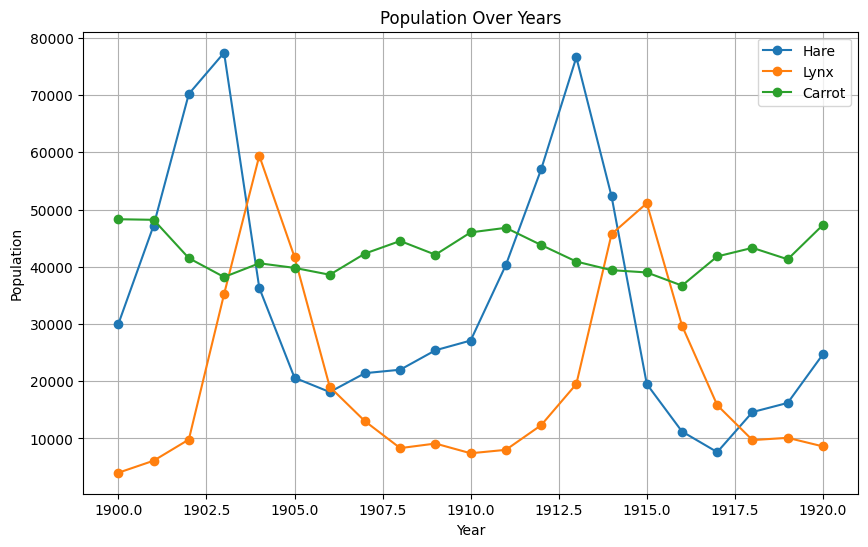

In [19]:
import pandas as pd

df = pd.read_csv('/content/data/populations.txt', sep='\t')
# Plot each column over the years
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['hare'], label='Hare', marker='o')
plt.plot(df['year'], df['lynx'], label='Lynx', marker='o')
plt.plot(df['year'], df['carrot'], label='Carrot', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Years')
plt.legend()
plt.grid(True)
plt.show()

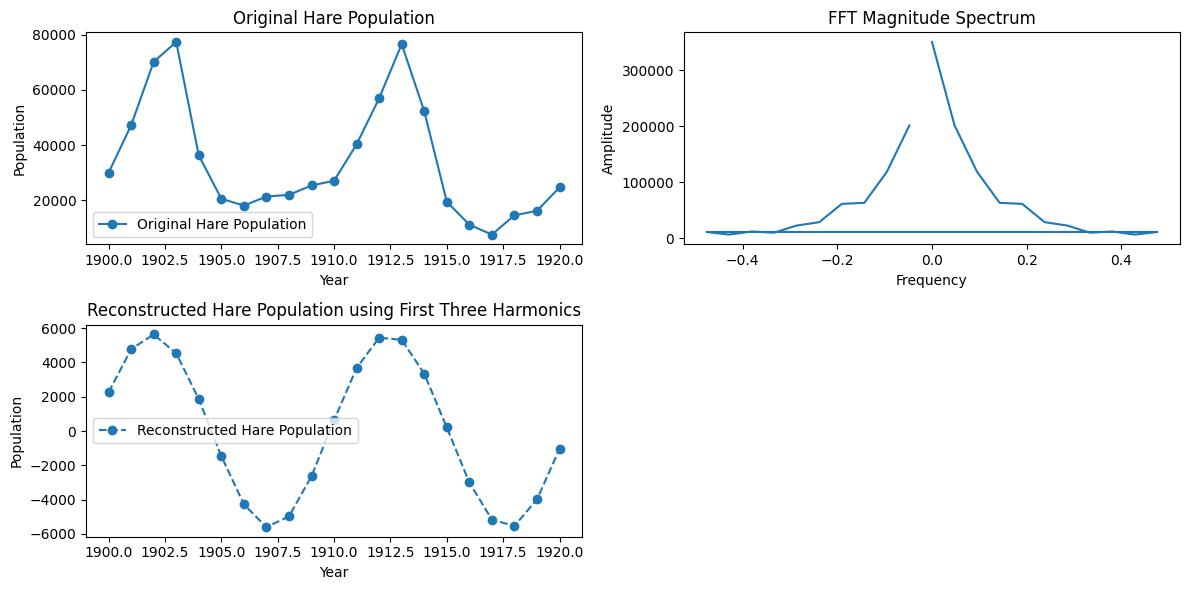

Period of the second harmonic: 10.5 years


In [20]:
num_repeats = 50
df_repeated = pd.concat([df] * num_repeats, ignore_index=True)


df_repeated['year'] = np.arange(1900, 1900 + len(df_repeated))

# Calculate the FFT
N = len(df_repeated)
dt = df_repeated['year'].values[1] - df_repeated['year'].values[0]  # Assuming a uniform time spacing
df['hare_windowed'] = df['hare'] * np.hanning(len(df['hare']))
# Calculate the FFT
N = len(df)
dt = df['year'].values[1] - df['year'].values[0]  # Assuming a uniform time spacing
freq = fftpack.fftfreq(N, dt)
hare_fft = fftpack.fft(df['hare_windowed'].to_numpy())

# Extract the first three harmonics
harmonic_indices = [2]  # Indices of the harmonics to extract
harmonics = np.zeros_like(hare_fft)
harmonics[harmonic_indices] = hare_fft[harmonic_indices]

# Reconstruct the signal using inverse FFT
hare_reconstructed = fftpack.ifft(harmonics).real

# Plot the original 'hare' population and the first three harmonics
plt.figure(figsize=(12, 6))

# Original 'hare' population
plt.subplot(2, 2, 1)
plt.plot(df['year'], df['hare'], label='Original Hare Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Original Hare Population')
plt.legend()

# FFT Magnitude Spectrum
plt.subplot(2, 2, 2)
plt.plot(freq, np.abs(hare_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT Magnitude Spectrum')

# Reconstructed 'hare' population using the first three harmonics
plt.subplot(2, 2, 3)
plt.plot(df['year'], hare_reconstructed, label='Reconstructed Hare Population', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Reconstructed Hare Population using First Three Harmonics')
plt.legend()





plt.tight_layout()
plt.show()

frequency_of_first_harmonic = freq[2]
period_of_first_harmonic = 1 / frequency_of_first_harmonic

print(f"Period of the second harmonic: {period_of_first_harmonic} years")


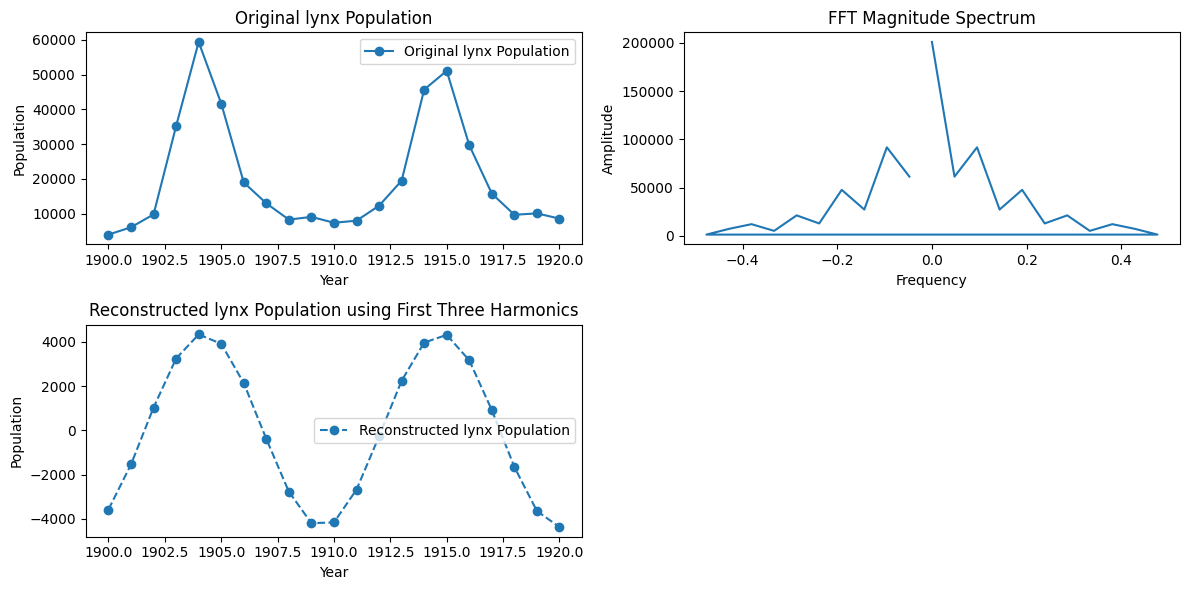

Period of the second harmonic: 10.5 years


In [21]:
df['lynx_windowed'] = df['lynx'] * np.hanning(len(df['lynx']))
# Calculate the FFT
N = len(df)
dt = df['year'].values[1] - df['year'].values[0]  # Assuming a uniform time spacing
freq = fftpack.fftfreq(N, dt)
lynx_fft = fftpack.fft(df['lynx_windowed'].to_numpy())

# Extract the first three harmonics
harmonic_indices = [2]  # Indices of the harmonics to extract
harmonics = np.zeros_like(lynx_fft)
harmonics[harmonic_indices] = lynx_fft[harmonic_indices]

# Reconstruct the signal using inverse FFT
lynx_reconstructed = fftpack.ifft(harmonics).real

# Plot the original 'lynx' population and the first three harmonics
plt.figure(figsize=(12, 6))

# Original 'lynx' population
plt.subplot(2, 2, 1)
plt.plot(df['year'], df['lynx'], label='Original lynx Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Original lynx Population')
plt.legend()

# FFT Magnitude Spectrum
plt.subplot(2, 2, 2)
plt.plot(freq, np.abs(lynx_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT Magnitude Spectrum')

# Reconstructed 'lynx' population using the first three harmonics
plt.subplot(2, 2, 3)
plt.plot(df['year'], lynx_reconstructed, label='Reconstructed lynx Population', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Reconstructed lynx Population using First Three Harmonics')
plt.legend()

plt.tight_layout()
plt.show()

frequency_of_first_harmonic = freq[2]
period_of_first_harmonic = 1 / frequency_of_first_harmonic

print(f"Period of the second harmonic: {period_of_first_harmonic} years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

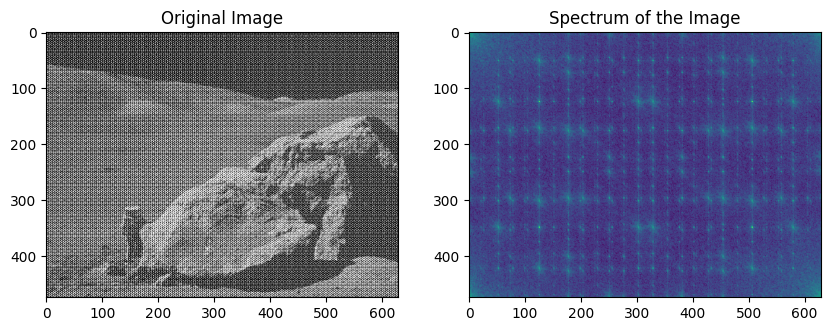

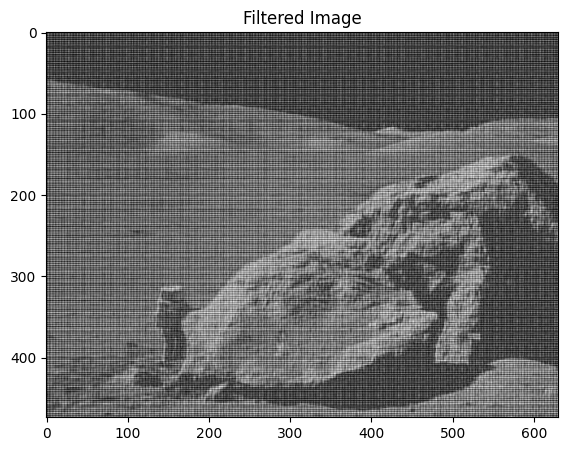

In [22]:
from matplotlib.colors import LogNorm
# Import the image as a 2D numpy array
image = plt.imread("/content/images/moonlanding.png")

# Plot the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Perform 2D FFT on the image
image_fft = fftpack.fft2(image)

# Plot the spectrum of the image
plt.subplot(1, 2, 2)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5), cmap='viridis')
plt.title('Spectrum of the Image')

noise_region_x = slice(50, -50)
noise_region_y = slice(50, -50)
image_fft[noise_region_x, noise_region_y] = 0

noise_region_y =  slice(40, 50)
image_fft[:, noise_region_y] = 0
noise_region_y = slice(60, 75)
image_fft[:, noise_region_y] = 0
noise_region_y =slice(120,130)
image_fft[:, noise_region_y] = 0
noise_region_y =slice(160,180)
image_fft[:, noise_region_y] = 0
noise_region_y =slice(290, 310)
image_fft[:, noise_region_y] = 0
noise_region_y =slice(340, 350)
image_fft[:, noise_region_y] = 0
noise_region_y = slice(390, 410)
image_fft[:, noise_region_y] = 0
noise_region_y =slice(420,440)
image_fft[:, noise_region_y] = 0

# Apply the inverse Fourier transform to get the filtered image
filtered_image = np.abs(fftpack.ifft2(image_fft))

# Plot the filtered image
plt.figure(figsize=(10, 5))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.show()